<a href="https://colab.research.google.com/github/JamesSharma04/python-testing-example/blob/first-tests/Recommender_Systems_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

The **aims** of this exercise are:

*   Allow you practice slicing and analysing data with Pandas
*   Introduce you to the MovieLens dataset
*   Demonstrate use of Pandas to perform non-personalised and personalised recommendations

This exercise is worth 5% of the contribution to your final mark for RecSys, and is expected to take approximately 5-7 hours of your time. NB: This is an individual exercise.



In [1]:
#Standard setup
import pandas as pd
import numpy as np

#Part A. MovieLens Exploration using Pandas

This exercise will use the [Movielens](https://grouplens.org/datasets/movielens/) data. There is a large dataset with 25M ratings, however we will focus on the smallest one, that has only 100k ratings.  

**Hint** : If you are using Colab, it might be good if you open these files, either on your own machine, or using Colab's inbuilt CSV viewer (via folder icon on the left hand sidebar). The CSV files are small enough to be searched using your favourite editor.

In [2]:
!curl -o ml-latest-small.zip http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
# backup location
#!curl -o ml-latest-small.zip http://www.dcs.gla.ac.uk/~craigm/recsysHM/ml-latest-small.zip

!unzip -o ml-latest-small.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0   957k      0 --:--:-- --:--:-- --:--:--  956k
Archive:  ml-latest-small.zip
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


Let's look into the files using Pandas:

In [3]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
movies_df = pd.read_csv("ml-latest-small/movies.csv")

# we're going to treat userId as strings, and similarly as movies. This will prevent confusion later on.
ratings_df['userId'] = "u" + ratings_df['userId'].astype(str)
ratings_df['movieId'] = "m" + ratings_df['movieId'].astype(str)
movies_df['movieId'] = "m" +  movies_df['movieId'].astype(str)

In [4]:
ratings_df

,userId,movieId,rating,timestamp
0,u1,m1,4.0,964982703
1,u1,m3,4.0,964981247
2,u1,m6,4.0,964982224
3,u1,m47,5.0,964983815
4,u1,m50,5.0,964982931
...,...,...,...,...
100831,u610,m166534,4.0,1493848402
100832,u610,m168248,5.0,1493850091
100833,u610,m168250,5.0,1494273047
100834,u610,m168252,5.0,1493846352


`ratings_df` is a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Viewing it, we can see users (identified by userId) are rating various movies (cf. movieId).

We can slice and dice the dataframes, e.g.:

 * project a single column (this returns a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)).

In [5]:
movies_df["title"]

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

 - project multiple columns (this returns a view of the original DataFrame, as another DataFrame object).

In [6]:
movies_df[["movieId", "title"]]

,movieId,title
0,m1,Toy Story (1995)
1,m2,Jumanji (1995)
2,m3,Grumpier Old Men (1995)
3,m4,Waiting to Exhale (1995)
4,m5,Father of the Bride Part II (1995)
...,...,...
9737,m193581,Black Butler: Book of the Atlantic (2017)
9738,m193583,No Game No Life: Zero (2017)
9739,m193585,Flint (2017)
9740,m193587,Bungo Stray Dogs: Dead Apple (2018)


 - Select rows based on one or more conditions

In [7]:
ratings_df[(ratings_df["userId"] == 'u500') & (ratings_df["rating"] == 1)]

,userId,movieId,rating,timestamp
79908,u500,m11,1.0,1005528017
79909,u500,m39,1.0,1005527926
79910,u500,m101,1.0,1005527980
79915,u500,m231,1.0,1005528039
79923,u500,m449,1.0,1005528017
79924,u500,m471,1.0,1005528017
79926,u500,m539,1.0,1005527980
79931,u500,m597,1.0,1005527980
79934,u500,m745,1.0,1005528205
79939,u500,m1188,1.0,1005528065




Let's practice a bit more with Pandas. You can also refer to the [Pandas Dataframe API documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

Write code to answer the following questions:

## Task 1. How many users are there in this dataset?


In [8]:
# add your solution here
len(ratings_df["userId"].unique())

610

## Task 2. What is the average rating of *each user*?

The output should be a Pandas Series containing an average rating for each of the users.

Hint: Use a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the ratings_df dataframe. [Aggregation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) will also be useful.


In [9]:
# add your solutions here
mean_ratings=ratings_df.groupby("userId")["rating"].mean()
mean_ratings

userId
u1      4.366379
u10     3.278571
u100    3.945946
u101    3.557377
u102    3.357143
          ...   
u95     4.062500
u96     3.884615
u97     4.194444
u98     3.913043
u99     3.867925
Name: rating, Length: 610, dtype: float64

In [10]:
mean_ratings['u200']

3.809880239520958

## Task 3. What is the average number of ratings per-user? 

In contrast to Task 2, the solution is a single number.

Many solutions will involve [GroupBy.count()](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation).

In [11]:
# add your solution here
ratings_df.groupby("userId").size()


userId
u1      232
u10     140
u100    148
u101     61
u102     56
       ... 
u95     168
u96      78
u97      36
u98      92
u99      53
Length: 610, dtype: int64

In [12]:
len(ratings_df)/len(ratings_df["userId"].unique())

165.30491803278687

## Analysing users's preferences.

Let's try something else. We can see what movies a given user has rated by "merging" the two dataframes - this equates to a JOIN in SQL. Let's do this for userId 556.


In [13]:
pd.merge(
    ratings_df[ratings_df["userId"]=='u556'], 
    movies_df, 
    on=["movieId"]).sort_values(by="rating", ascending=False)

,userId,movieId,rating,timestamp,title,genres
0,u556,m588,5.0,1534321062,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
2,u556,m4896,5.0,1534320962,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
27,u556,m112852,5.0,1534321287,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi
21,u556,m76093,5.0,1534320965,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
3,u556,m4993,4.5,1534320935,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
4,u556,m5816,4.5,1534320982,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
23,u556,m88125,4.5,1534320986,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
13,u556,m49649,4.5,1534321075,Eragon (2006),Action|Adventure|Fantasy
18,u556,m72998,4.0,1534321171,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
30,u556,m162600,4.0,1534321200,Miss Peregrine's Home for Peculiar Children (2...,Fantasy


It appears that this user is interested in adventure/fantasies movies.

NB: If the columns we are joining on dont have the same name, we can specify `left_on` and `right_on` attributes. See also the  [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) documentation.

## Task 4. Analysing movie categories

Lets examine two particular users a bit more, u556 and u7.

 - How many movies with "Fantasy" genre have u556 and u7 rated positively ($\geq 4$)? 

 - Consider all of u556's ratings. What percentage of all these ratings are positive ratings ($\geq 4$) and are for movies belonging to the "Fantasy" genre?

Hints:
 - Pandas Series has a useful `str.contains()` function:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
 - Pandas dataframes respond to `len()` as you would expect.

In [14]:
# add your solution here
print(len(pd.merge(
    ratings_df[((ratings_df.userId=='u556') | (ratings_df.userId=='u7')) & (ratings_df.rating>=4)], 
    movies_df[movies_df.genres.str.contains("Fantasy")], 
    on=["movieId"])))

u556 = ratings_df[ratings_df.userId=='u556'].merge(movies_df)
u7 = ratings_df[ratings_df.userId=='u7'].merge(movies_df)
u556_ge4_fantasy = u556[(u556.rating>=4) & (u556.genres.str.contains("Fantasy"))]
print(len(u556_ge4_fantasy)/len(u556))

print(len(u556[(u556.rating>=4) & (u556.genres.str.contains("Fantasy"))]))

print(len(u7[(u7.rating>=4) & (u7.genres.str.contains("Fantasy"))]))

33
0.6875
22
11


In [15]:
ratings_df

,userId,movieId,rating,timestamp
0,u1,m1,4.0,964982703
1,u1,m3,4.0,964981247
2,u1,m6,4.0,964982224
3,u1,m47,5.0,964983815
4,u1,m50,5.0,964982931
...,...,...,...,...
100831,u610,m166534,4.0,1493848402
100832,u610,m168248,5.0,1493850091
100833,u610,m168250,5.0,1494273047
100834,u610,m168252,5.0,1493846352


# Part B. Popularity-based Recomendation

Now let's examine the ratings of movies. 

We can get a dataframe containing the number of times a movie has been rated by applying a groupby and aggregation of the ratings_df.


In [19]:

pos_ratings = ratings_df[ratings_df["rating"] >= 4]
groupingCountSeries_pos = pos_ratings[["movieId", "rating"]].groupby(["movieId"]).count()
groupingCountSeries = ratings_df[["movieId", "rating"]].groupby(["movieId"]).count()
groupingCountSeries[groupingCountSeries.rating<25]

,rating
movieId,
m100,14
m100044,1
m100068,1
m100083,3
m100106,1
...,...
m99853,1
m999,12
m99910,2


##Task 5. Plot the distribution of movie ratings.

Use Matplotlib's histogram function to plot the distribution of movie ratings from the `groupingCountSeries` dataframe. This will produce a bar chart with 'binned' counts.

Hints: 
- apply a logarithmic scale for the y-axis, using matplotlib's `log=True` option.
- Allow matplotlib to use its default number of bins (which is 10).
- Matplotlib has a [`savefig()`](https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/#the-savefig-method) function for saving a PNG of a figure.

Marks will be lost for poor quality graphs, lacking in typical best practices. You will need to analyse this graph in the quiz.

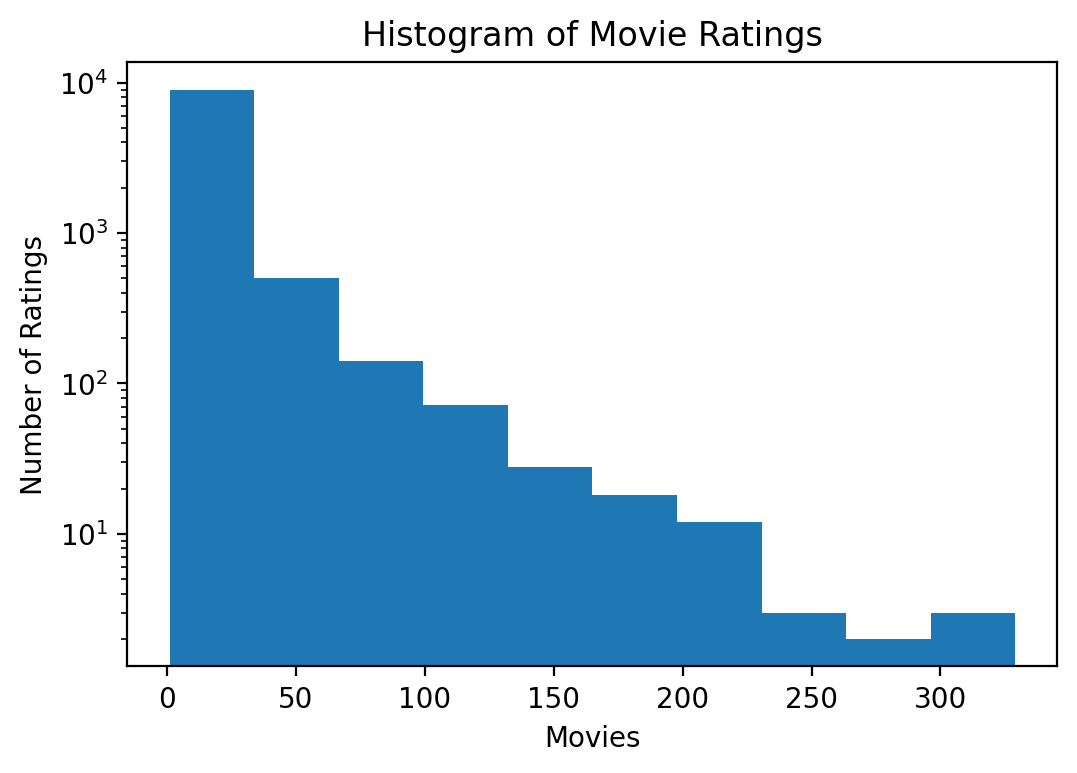

In [20]:
# add your solution here

import matplotlib.pyplot as plt
import os
cwd = os.getcwd()

type(groupingCountSeries.rating)
fig = plt.figure()
plot=plt.hist(groupingCountSeries.rating, log=True)
plt.title('Histogram of Movie Ratings')
plt.xlabel('Movies')
plt.ylabel('Number of Ratings')
fig.set_dpi(200)
plot
plt.savefig(cwd)


## Task 6. Find the names of *all* of the movies that have the highest *average* ratings

You should return a dataframe containing the ids and names of the movies, their average ratings, and the number of ratings. NB: You may need to analyse this dataframe further to answer the questions in the quiz.

Hints:
 - Try a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). Once you have a Series with columns [movieId, meanRating], identify the highest value of meanRating. You can then merge this with the movies_df.
 - If the column we are trying to merge on is an index, we can use  `left_index=True` or `right_index=True` in the [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html).


In [21]:
# add your solution here

# get a dataframe containing the average rating for each movie
avg_ratings = ratings_df[["movieId", "rating"]].groupby(["movieId"]).mean().sort_values(by=['rating'], ascending=False)

# change column name to increase readability 
avg_ratings.rename(columns={'rating':'meanRating'}, inplace=True)


# add number of times each movie is rated
avg_ratings['count']=groupingCountSeries['rating']

# reset index to access movie ID
avg_ratings.reset_index(inplace=True)

# construct masks to answer moodie quiz questions
max_mask=avg_ratings.meanRating==5
m6442_mask=avg_ratings.movieId=='m6442'

# print answers to moodle quiz questions 
print(len(avg_ratings[max_mask]))
print(avg_ratings[max_mask]['count'].sum())
print(avg_ratings[m6442_mask]['count'].values[0])
# plot distribution of count for sanity check
#plt.hist(avg_ratings['count'], bins=300, log=True)

296
303
2


You can now answer the questions in the quiz for Task 6, based on your  observations on analysing this table?

# Part C - Association Rules and Lift

I think we can do better than simply examining movie popularity. 

Lets take all of the positive ratings (4 or 5) to find the most popular pairs of movies that users have watched. We'll consider these are "successful movie watches" of these users.

There is a lot going on there, so please take the time to break it down to understand what it does.

NB: In this code, we perform a "self-join" on a dataframe. If this is unfamiliar, you can read more at:
 - https://dfrieds.com/data-analysis/self-join-python-pandas.html
 - https://www.w3schools.com/sql/sql_join_self.asp



In [22]:
positives = ratings_df[ratings_df["rating"]>=4]

# join positives with itself on userId to get all distinct pairs of movies watched by a given user.
pairs = pd.merge(positives, positives, on=["userId"])
pairs = pairs[ pairs["movieId_x"] != pairs["movieId_y"] ]

# we only want A->B, not B->A. Use the timestamps to restrict the selected pairs such that
# one movie is rated after the other movie, OR if the timestampes are tied, we break such 
# a tie by movieId. Bitwise operators & and | are used for combining Pandas series containing booleans
sequences = pairs[
                  (pairs["timestamp_x"] < pairs["timestamp_y"])
                  |
                  (
                      (pairs["timestamp_x"] == pairs["timestamp_y"])
                      &
                      (pairs["movieId_x"] < pairs["movieId_y"])
                  )
                  ]

# lets count the frequency of each pair of movies. As a user can only rate a movie once, you can
# also think of this as the number of users that have watched each pair of movies.
paircounts = sequences[["movieId_x", "movieId_y", "userId"]].groupby(["movieId_x", "movieId_y"]).count()

# sort by the most popular pairs.
pairswithcounts = paircounts.reset_index().rename(columns={"userId" : "count"}).sort_values(['count'], ascending=False)

# display the top most frequent pairs
pairswithcounts.head()

,movieId_x,movieId_y,count
1579647,m318,m356,112
1580428,m318,m527,98
1421549,m296,m593,95
1420937,m296,m47,92
1191679,m260,m1196,91


## Task 7. Display the titles of the (most popular) movie pairs from `pairswithcounts`

You will need to analyse this dataframe to complete the questions in the quiz.

Hint:
 - you will need to re-sort after a pd.merge()

In [23]:
#add your solution here

# add the title and genre of movieId_x
movie_pairs = pairswithcounts.merge(movies_df, left_on='movieId_x', right_on='movieId')
# add the title and genre of movieId_y
movie_pairs_both = movie_pairs.merge(movies_df, left_on='movieId_y', right_on='movieId')
#strip duplicate columns generated by previous merge
movie_pairs_both = movie_pairs_both.loc[:,~movie_pairs_both.columns.duplicated()].copy()
#sort on count
movie_pairs_both.sort_values(['count'], ascending=False, inplace=True)

movie_pairs_both.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'movieId_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y
0,m318,m356,112,"Shawshank Redemption, The (1994)",Crime|Drama,Forrest Gump (1994),Comedy|Drama|Romance|War
2141,m318,m527,98,"Shawshank Redemption, The (1994)",Crime|Drama,Schindler's List (1993),Drama|War
4194,m296,m593,95,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
17826,m296,m47,92,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
24736,m260,m1196,91,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi


## Task 8. Calculate Lift (see Lecture 3) for all pairs in `paircounts`.  

Now you should calculate Lift. You will need to carefully consider your event space.

Your target dataframe should have columns: 
 - movieId_x	movieId_y	
 - count - number of users that have positively rated both movies x and y.
 - ratingCount_x	ratingCount_y	- number of users that have positively rated these movies in total.
 - lift	- your calculated lift.
 - title_x, title_y, genre_x and genre_y - metadata about the films, so you know if you have success. 

Hints: 
 - You will need to join `pairswithcounts` with a dataframe containing rating counts of individual movies. A calculated column will be needed. See https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html or https://stackoverflow.com/a/12377083/9989050 for hints on how to achieve that.
 - If you come across duplicated columns in your solution, you can use this trick https://stackoverflow.com/a/40435354/9989050 to get rid of them.
 - You should [sort](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) your dataframe.

Below I provide the highest lift movies for you to check your solution.


In [48]:
# add your solution here

# add rating_x
pairswithcounts_rating_pos = movie_pairs_both.merge(groupingCountSeries_pos, left_on='movieId_x', right_index=True)
# add rating_y
pairswithcounts_rating_pos = pairswithcounts_rating_pos.merge(groupingCountSeries_pos, left_on='movieId_y', right_index=True)
# remove duplicate columns from previous merges
pairswithcounts_rating_pos = pairswithcounts_rating_pos.loc[:,~pairswithcounts_rating_pos.columns.duplicated()].copy()

pairswithcounts_rating_pos


,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y
0,m318,m356,112,"Shawshank Redemption, The (1994)",Crime|Drama,Forrest Gump (1994),Comedy|Drama|Romance|War,274,249
1,m296,m356,88,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Forrest Gump (1994),Comedy|Drama|Romance|War,244,249
2,m260,m356,49,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,Forrest Gump (1994),Comedy|Drama|Romance|War,201,249
3,m2571,m356,77,"Matrix, The (1999)",Action|Sci-Fi|Thriller,Forrest Gump (1994),Comedy|Drama|Romance|War,222,249
4,m4993,m356,38,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,Forrest Gump (1994),Comedy|Drama|Romance|War,146,249
...,...,...,...,...,...,...,...,...,...
3540430,m124851,m103543,1,Delirium (2014),Adventure|Romance|Sci-Fi,"Lifeguard, The (2013)",Comedy|Drama,1,1
3540432,m114265,m124851,1,Laggies (2014),Comedy|Romance,Delirium (2014),Adventure|Romance|Sci-Fi,1,1
3540434,m130490,m124851,1,Insurgent (2015),Action|Sci-Fi|Thriller,Delirium (2014),Adventure|Romance|Sci-Fi,1,1
3540433,m113829,m124851,1,"One I Love, The (2014)",Comedy|Drama|Romance,Delirium (2014),Adventure|Romance|Sci-Fi,1,1


In [49]:
# denominator for lift equation
unique_count=len(ratings_df["userId"].unique())
# calculate lift 
pairswithcounts_rating_pos["lift"]=pairswithcounts_rating_pos["count"]/(pairswithcounts_rating_pos["rating_x"] * pairswithcounts_rating_pos["rating_y"]) * unique_count
# sort results
pairswithcounts_rating_pos.sort_values(['lift'], ascending=False)


,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
3540436,m130490,m114265,1,Insurgent (2015),Action|Sci-Fi|Thriller,Laggies (2014),Comedy|Romance,1,1,610.000000
2864102,m32898,m26184,1,"Trip to the Moon, A (Voyage dans la lune, Le) ...",Action|Adventure|Fantasy|Sci-Fi,"Diamond Arm, The (Brilliantovaya ruka) (1968)",Action|Adventure|Comedy|Crime|Thriller,1,1,610.000000
3357545,m4626,m3017,1,Miracle Mile (1989),Drama|Romance|Sci-Fi,Creepshow 2 (1987),Horror,1,1,610.000000
3357548,m8426,m3017,1,Robot Carnival (Roboto kânibauru) (1987),Animation|Comedy|Drama|Fantasy|Sci-Fi,Creepshow 2 (1987),Horror,1,1,610.000000
3357547,m8147,m3017,1,Charly (1968),Drama|Sci-Fi,Creepshow 2 (1987),Horror,1,1,610.000000
...,...,...,...,...,...,...,...,...,...,...
218601,m2959,m161,1,Fight Club (1999),Action|Crime|Drama|Thriller,Crimson Tide (1995),Drama|Thriller|War,179,57,0.059786
10973,m329,m296,1,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,42,244,0.059524
902972,m2959,m349,1,Fight Club (1999),Action|Crime|Drama|Thriller,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,179,58,0.058756
3120472,m80463,m318,1,"Social Network, The (2010)",Drama,"Shawshank Redemption, The (1994)",Crime|Drama,38,274,0.058586


In [50]:
pairswithcounts_rating_pos[(pairswithcounts_rating_pos["movieId_x"] == 'm318') & (pairswithcounts_rating_pos["movieId_y"] == 'm527')]

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
2141,m318,m527,98,"Shawshank Redemption, The (1994)",Crime|Drama,Schindler's List (1993),Drama|War,274,175,1.246715


In [51]:
pairswithcounts_rating_pos[(pairswithcounts_rating_pos["movieId_x"] == 'm91500') & (pairswithcounts_rating_pos["movieId_y"] == 'm106487')]

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
976602,m91500,m106487,10,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,24,14,18.154762


If your solution is correct, you will see the highest lift movie pairs. 
Let's check them - do the highest lift movies pairs make sense? e.g. "Pink Panther, The (2006)" (Adventure|Comedy|Crime) with	"For Richer or Poorer (1997)" (Comedy). 

It should be clear that these lift pairs do not have high support. 

## Task 9 - Support Thresholds


We can make more meaningful recommendations using Lift if we apply a Support threshold. For instance, we can remove movie pairs with support count $< 10$.

So in essence, we can use lift to identify highly co-occurring movie pairs without resorting to any collaborative notions.

Keep this dataframe around - you will need it to answer the questions for Task 9 in the quiz.

In [52]:
# add your solution here
support_mask=pairswithcounts_rating_pos['count']>=10
support_df=pairswithcounts_rating_pos[support_mask]
support_df.sort_values(['lift'], ascending=False)
 

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
988085,m91500,m116823,11,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Mockingjay - Part 1 (2014),Adventure|Sci-Fi|Thriller,24,15,18.638889
976602,m91500,m106487,10,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,24,14,18.154762
603837,m115713,m139385,10,Ex Machina (2015),Drama|Sci-Fi|Thriller,The Revenant (2015),Adventure|Drama,20,19,16.052632
827988,m91658,m67255,10,"Girl with the Dragon Tattoo, The (2011)",Drama|Thriller,"Girl with the Dragon Tattoo, The (Män som hata...",Crime|Drama|Mystery|Thriller,24,19,13.377193
864605,m34162,m8807,10,Wedding Crashers (2005),Comedy|Romance,Harold and Kumar Go to White Castle (2004),Adventure|Comedy,25,19,12.842105
...,...,...,...,...,...,...,...,...,...,...
15424,m457,m2571,13,"Fugitive, The (1993)",Thriller,"Matrix, The (1999)",Action|Sci-Fi|Thriller,137,222,0.260735
3120282,m1206,m318,10,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,"Shawshank Redemption, The (1994)",Crime|Drama,86,274,0.258869
3120267,m364,m318,13,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,"Shawshank Redemption, The (1994)",Crime|Drama,115,274,0.251666
10804,m457,m296,13,"Fugitive, The (1993)",Thriller,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,137,244,0.237226


In [55]:
support_df[support_df["movieId_x"] == 'm110'].sort_values(['lift'],ascending=False)

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
1323238,m110,m2403,12,Braveheart (1995),Action|Drama|War,First Blood (Rambo: First Blood) (1982),Action|Adventure|Drama|Thriller,166,14,3.149742
741830,m110,m151,18,Braveheart (1995),Action|Drama|War,Rob Roy (1995),Action|Drama|Romance|War,166,22,3.006572
487590,m110,m266,21,Braveheart (1995),Action|Drama|War,Legends of the Fall (1994),Drama|Romance|War|Western,166,31,2.489312
847561,m110,m5630,10,Braveheart (1995),Action|Drama|War,Red Dragon (2002),Crime|Mystery|Thriller,166,15,2.449799
1123754,m110,m552,12,Braveheart (1995),Action|Drama|War,"Three Musketeers, The (1993)",Action|Adventure|Comedy|Romance,166,19,2.320862
...,...,...,...,...,...,...,...,...,...,...
241690,m110,m750,10,Braveheart (1995),Action|Drama|War,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,166,78,0.471115
97089,m110,m4973,12,Braveheart (1995),Action|Drama|War,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,166,95,0.464172
4205,m110,m593,28,Braveheart (1995),Action|Drama|War,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,166,225,0.457296
38341,m110,m58559,13,Braveheart (1995),Action|Drama|War,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,166,112,0.426528


In [56]:
support_df[support_df["movieId_x"] == 'm364'].sort_values(['lift'],ascending=False)

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
1707384,m364,m1566,11,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,Hercules (1997),Adventure|Animation|Children|Comedy|Musical,115,16,3.646739
1615100,m364,m48,13,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,115,22,3.134387
907779,m364,m362,10,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,"Jungle Book, The (1994)",Adventure|Children|Romance,115,17,3.120205
640655,m364,m317,15,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,"Santa Clause, The (1994)",Comedy|Drama|Fantasy,115,26,3.060201
1146708,m364,m1022,10,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,Cinderella (1950),Animation|Children|Fantasy|Musical|Romance,115,18,2.946860
...,...,...,...,...,...,...,...,...,...,...
20157,m364,m260,12,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,115,201,0.316677
10846,m364,m296,14,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,115,244,0.304348
15466,m364,m2571,12,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,"Matrix, The (1999)",Action|Sci-Fi|Thriller,115,222,0.286722
3120267,m364,m318,13,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,"Shawshank Redemption, The (1994)",Crime|Drama,115,274,0.251666


I got the "The Hunger Games (2012)" paired with "The Hunger Games: Mockingjay - Part 1 (2014)" as the movie pair with the highest lift. This seems a good pairing!

# End of Exercise

As part of your submission, you should complete the Exercise 1 quiz on Moodle.
You will need to upload your notebook, complete with the **results** of executing the code.